In [1]:
from os.path import join

import numpy as np
from numpy.fft import fft, ifft, fftshift, fft2

import matplotlib.pyplot as plt
from matplotlib.image import imread

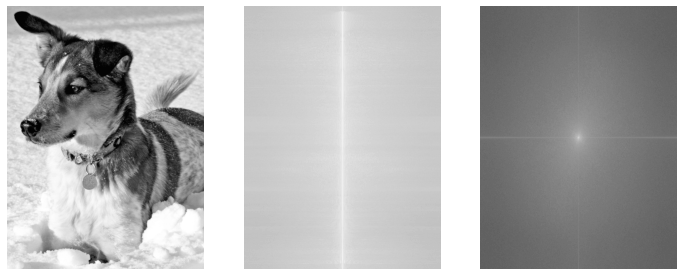

In [2]:
# Read image and convert to grayscale
A = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=2)

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot image
axs[0].imshow(A, cmap='gray')
axs[0].axis(False)

# Compute row-wise FFT
B = fft(A, axis=-1)
axs[1].imshow(
    np.log(np.abs(fftshift(B, axes=-1))),
    cmap='gray'
)
axs[1].axis(False)

# Compute column-wise FFT
C = fft(B, axis=0)
img = axs[2].imshow(
    fftshift(np.log(np.abs(C))),
    cmap='gray'
)
axs[2].axis(False)

# Much more efficient to use fft2
assert np.allclose(C, fft2(A))